In [176]:
import xarray as xr
import numpy as np
import scipy as sp
import scipy.ndimage
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve


In [177]:
data = np.load('/Users/drigo/ITMO/_disser/surrogate/data/results/res_1222_0754_comp.npy')
data = data[:365]

In [103]:
nc = xr.open_dataset('/Users/drigo/ITMO/_disser/surrogate/data/cr2smos_th_y2014.nc')
dates = pd.date_range('01/01/2014', '31/12/2014',freq='D')

In [155]:
out = xr.Dataset(coords = nc.coords)

In [178]:
data = np.pad(data[5:-5], ((5, 5),(0,0),(0,0)), 'edge')

data[data==0]=np.nan
uncert = np.copy(data)
uncert[:] = 0.3
uncert[np.isnan(data)]=np.nan

# sigma=2.0

# mask = ~np.isnan(data)
# data=data[mask]
# smoothed = []
# for i, slc in enumerate(data):
#     y = gaussian_filter(data[i,:,:], sigma, mode='nearest')
#     smoothed.append(y)
# smoothed = np.array(smoothed)

In [196]:
smoothed = []

kernel = Gaussian2DKernel(x_stddev=1)

for i, slc in enumerate(data):
    y = convolve(data[i,:,:], kernel)
    smoothed.append(y)
smoothed = np.array(smoothed)
smoothed[np.isnan(data)]=np.nan

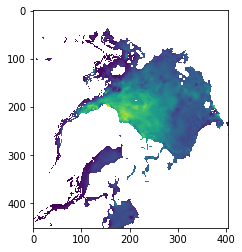

In [197]:
plt.imshow(smoothed[7,:,:])

In [198]:
out['Thickness'] = (['time','y', 'x'],smoothed)
out['Uncertainty'] = (['time','y', 'x'],uncert)

out.time.data = [d.strftime('%Y%m%d.%f') for d in dates]

In [199]:
out.to_netcdf('cr2smos_th_y2014_restored_smooth1.nc')

In [44]:
len(out.time.data)

365

In [79]:
data.shape

(365, 452, 406)